# Trilateration Graphics
This is an auto-generated notebook.

In [3]:
#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn import svm
from Utils import GeoUtils

In [4]:
def getDistance(real, predict):
    lat1 = real[:,0]
    lon1 = real[:,1]
    lat2 = predict[:,0]
    lon2 = predict[:,1]

    return np.array(GeoUtils.GeoUtils.distanceInKm(lat1, lon1,lat2, lon2))

In [5]:
data_real = pd.read_csv("Dados/LocTreino_Equipe_4.csv")

# bts_data = pd.read_csv("Dados/dados_BTSs.csv")
data_1 = pd.read_csv("Dados/Resultados_1.csv") #C232Hata
data_1 = data_1[data_1.erro_loc != float("inf")]

data_2 = pd.read_csv("Dados/Resultados_2.csv") #SUI Model
data_2 = data_2[data_2.erro_loc != float("inf")]

data_3 = pd.read_csv("Dados/Resultados_3.csv") #FSPL with sqrt
data_4 = pd.read_csv("Dados/Resultados_4.csv") #Trilat + MachineL

In [6]:
# plt.hist(getDistance((data_real['lat'],data_real['lon']), (data_1['lat'],data_1['lon']), normed=False, bins=30)
sreal = data_real.as_matrix(columns=['lat','lon']) #3 and 4

spred1 = data_1.as_matrix(columns=['lat_pred', 'lon_pred'])
sreal1 = data_1.as_matrix(columns=['lat','lon'])

spred2 = data_2.as_matrix(columns=['lat_pred', 'lon_pred'])
sreal2 = data_2.as_matrix(columns=['lat','lon'])

spred3 = data_3.as_matrix(columns=['lat_pred', 'lon_pred'])
spred4 = data_4.as_matrix(columns=['lat_pred', 'lon_pred'])


# print getDistance()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # 

In [7]:
data_1.describe()

,pontoId,lat,lon,lat_pred,lon_pred,erro_loc
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,1691.234188,-8.068906,-34.894743,-8.069227,-34.893645,709.314639
std,999.746155,0.005207,0.005818,0.003546,0.003484,380.236323
min,2.000000,-8.077570,-34.906830,-8.079167,-34.905628,44.250925
25%,637.000000,-8.073983,-34.899921,-8.071551,-34.895531,417.102818
50%,1890.000000,-8.068806,-34.895985,-8.069270,-34.893391,668.498825
75%,2619.000000,-8.064383,-34.889503,-8.066817,-34.891174,937.223299
max,2955.000000,-8.059339,-34.885067,-8.059690,-34.885283,1894.253110


/home/arnaldo/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([  8.,  20.,  19.,  22.,  38.,  35.,  38.,  43.,  35.,  31.,  41.,
         34.,  33.,  30.,  27.,  19.,  15.,  19.,  19.,  12.,   8.,   7.,
          5.,   3.,   5.,   6.,   7.,   1.,   2.,   3.]),
 array([   44.0138143 ,   105.59430555,   167.1747968 ,   228.75528805,
          290.3357793 ,   351.91627055,   413.49676179,   475.07725304,
          536.65774429,   598.23823554,   659.81872679,   721.39921804,
          782.97970929,   844.56020054,   906.14069179,   967.72118304,
         1029.30167429,  1090.88216553,  1152.46265678,  1214.04314803,
         1275.62363928,  1337.20413053,  1398.78462178,  1460.36511303,
         1521.94560428,  1583.52609553,  1645.10658678,  1706.68707802,
         1768.26756927,  1829.84806052,  1891.42855177]),
 <a list of 30 Patch objects>)

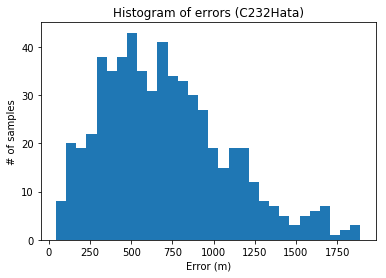

In [8]:
plt.title('Histogram of errors (C232Hata)')
plt.ylabel('# of samples')
plt.xlabel('Error (m)')

plt.hist(getDistance(sreal1, spred1)*1000, normed=False, bins=30)

In [9]:
data_2.describe()

,pontoId,lat,lon,lat_pred,lon_pred,erro_loc
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,1529.630525,-8.069824,-34.894488,-8.070520,-34.895396,508.370337
std,886.554420,0.004459,0.004635,0.004535,0.004986,383.426597
min,2.000000,-8.077570,-34.906830,-8.085337,-34.913251,8.822389
25%,708.500000,-8.073426,-34.897819,-8.073847,-34.898533,230.827966
50%,1602.000000,-8.069567,-34.894302,-8.069877,-34.894610,398.473326
75%,2321.500000,-8.066290,-34.890564,-8.067329,-34.892086,686.147630
max,2955.000000,-8.059339,-34.885067,-8.053880,-34.876797,2570.928693


(array([  71.,  137.,  153.,  157.,  145.,   85.,  100.,   60.,   41.,
          47.,   46.,   27.,   33.,   21.,   21.,   10.,   14.,    5.,
           7.,    7.,    3.,    2.,    2.,    1.,    1.,    1.,    1.,
           0.,    0.,    1.]),
 array([    8.81628382,    94.2882074 ,   179.76013098,   265.23205457,
          350.70397815,   436.17590173,   521.64782531,   607.11974889,
          692.59167247,   778.06359605,   863.53551963,   949.00744321,
         1034.47936679,  1119.95129037,  1205.42321396,  1290.89513754,
         1376.36706112,  1461.8389847 ,  1547.31090828,  1632.78283186,
         1718.25475544,  1803.72667902,  1889.1986026 ,  1974.67052618,
         2060.14244977,  2145.61437335,  2231.08629693,  2316.55822051,
         2402.03014409,  2487.50206767,  2572.97399125]),
 <a list of 30 Patch objects>)

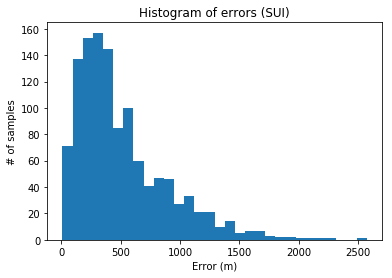

In [10]:
plt.title('Histogram of errors (SUI)')
plt.ylabel('# of samples')
plt.xlabel('Error (m)')

plt.hist(getDistance(sreal2, spred2)*1000, normed=False, bins=30)

In [11]:
data_3.describe()

,pontoId,lat,lon,lat_pred,lon_pred,erro_loc
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1471.292667,-8.070097,-34.894814,-8.070583,-34.894691,173.419820
std,849.057388,0.004232,0.004354,0.003460,0.004163,184.951307
min,2.000000,-8.077570,-34.906830,-8.078334,-34.904005,3.171664
25%,746.750000,-8.073197,-34.897387,-8.073237,-34.897748,64.542856
50%,1464.500000,-8.069940,-34.895346,-8.070043,-34.894937,117.636945
75%,2190.250000,-8.067113,-34.891169,-8.068358,-34.891195,198.160391
max,2955.000000,-8.059339,-34.885067,-8.061198,-34.883677,1074.273696


(array([ 165.,  272.,  261.,  221.,  151.,  125.,   60.,   51.,   22.,
          19.,   13.,   14.,   10.,    5.,    7.,    3.,   11.,   12.,
          15.,   10.,   15.,    7.,    5.,    2.,    4.,    4.,    7.,
           2.,    4.,    3.]),
 array([    3.16379452,    38.71554122,    74.26728793,   109.81903464,
          145.37078135,   180.92252805,   216.47427476,   252.02602147,
          287.57776817,   323.12951488,   358.68126159,   394.23300829,
          429.784755  ,   465.33650171,   500.88824841,   536.43999512,
          571.99174183,   607.54348853,   643.09523524,   678.64698195,
          714.19872866,   749.75047536,   785.30222207,   820.85396878,
          856.40571548,   891.95746219,   927.5092089 ,   963.0609556 ,
          998.61270231,  1034.16444902,  1069.71619572]),
 <a list of 30 Patch objects>)

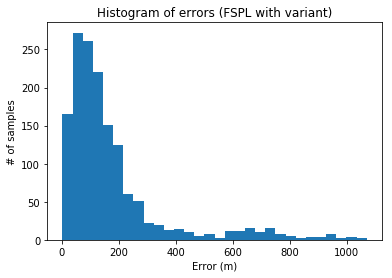

In [12]:
plt.title('Histogram of errors (FSPL with variant)')
plt.ylabel('# of samples')
plt.xlabel('Error (m)')

plt.hist(getDistance(sreal, spred3)*1000, normed=False, bins=30)

In [13]:
data_4.describe()

,pontoId,lat,lon,lat_pred,lon_pred,erro_loc
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1471.292667,-8.070097,-34.894814,-8.070045,-34.894876,34.537955
std,849.057388,0.004232,0.004354,0.004178,0.004263,47.764764
min,2.000000,-8.077570,-34.906830,-8.077608,-34.906663,0.391796
25%,746.750000,-8.073197,-34.897387,-8.073150,-34.897249,7.739809
50%,1464.500000,-8.069940,-34.895346,-8.069866,-34.895347,18.090319
75%,2190.250000,-8.067113,-34.891169,-8.067074,-34.891264,40.796200
max,2955.000000,-8.059339,-34.885067,-8.059458,-34.885189,360.943777


(array([ 586.,  294.,  181.,  135.,  108.,   45.,   26.,   17.,   15.,
          10.,    3.,    3.,    8.,    5.,   14.,   16.,    7.,    3.,
           1.,    4.,    7.,    4.,    2.,    0.,    0.,    1.,    0.,
           2.,    1.,    2.]),
 array([   0.39090133,   12.34621749,   24.30153365,   36.25684982,
          48.21216598,   60.16748214,   72.12279831,   84.07811447,
          96.03343064,  107.9887468 ,  119.94406296,  131.89937913,
         143.85469529,  155.81001146,  167.76532762,  179.72064378,
         191.67595995,  203.63127611,  215.58659228,  227.54190844,
         239.4972246 ,  251.45254077,  263.40785693,  275.36317309,
         287.31848926,  299.27380542,  311.22912159,  323.18443775,
         335.13975391,  347.09507008,  359.05038624]),
 <a list of 30 Patch objects>)

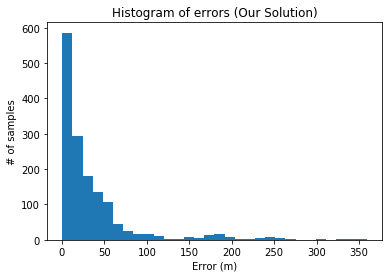

In [14]:
plt.title('Histogram of errors (Our Solution)')
plt.ylabel('# of samples')
plt.xlabel('Error (m)')

plt.hist(getDistance(sreal, spred4)*1000, normed=False, bins=30)

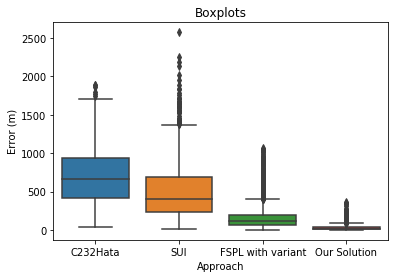

In [15]:
erro_1 = getDistance(sreal1,spred1)*1000
erro_2 = getDistance(sreal2,spred2)*1000
erro_3 = getDistance(sreal,spred3)*1000
erro_4 = getDistance(sreal,spred4)*1000

allerrors = []

allerrors.extend(erro_1)
allerrors.extend(erro_2)
allerrors.extend(erro_3)
allerrors.extend(erro_4)



labels = []
labels.extend(np.repeat('C232Hata',erro_1.shape))
labels.extend(np.repeat('SUI',erro_2.shape))
labels.extend(np.repeat('FSPL with variant',erro_3.shape))
labels.extend(np.repeat('Our Solution',erro_4.shape))


df_data = {'Error (m)': allerrors,
           'Approach': labels}
df = pd.DataFrame(df_data)
plt.title('Boxplots')
sns.boxplot(x='Approach', y='Error (m)', data=df,width=0.8)
plt.show()


In [16]:
import scipy.stats as scp


scp.stats.friedmanchisquare(data_real['lat'],
                            data_3['lat_pred'],
                            data_4['lat_pred'])



FriedmanchisquareResult(statistic=24.409333333333052, pvalue=5.0070348385765567e-06)

In [17]:
scp.stats.friedmanchisquare(data_real['lon'],
                            data_3['lon_pred'],
                            data_4['lon_pred'])

FriedmanchisquareResult(statistic=21.324000000000524, pvalue=2.341813115375397e-05)

In [18]:
# import folium 

# maap = folium.Map(location=[data_real['lat'].mean(),
#                                     data_real['lon'].mean()],
#                           zoom_start=13,
#                           tiles='CartoDB dark_matter')

# for i, (pos, pred_pos) in enumerate(zip(sreal,
#                                         spred3)):

#     marker = folium.CircleMarker(location=pos,
#                                  color='blue',
#                                  weight=2,
#                                  radius=1,
#                                  fill_color='blue',
#                                  fill=True)
#     marker.add_to(maap)
#     marker = folium.CircleMarker(location=pred_pos,
#                                  color='yellow',
#                                  weight=2,
#                                  radius=1,
#                                  fill_color='yellow',
#                                  fill=True)
#     marker.add_to(maap)
    
#     folium.PolyLine([pos, pred_pos],
#                     color="white",
#                     weight=1,
#                     opacity=0.5).add_to(maap)
    
# maap


In [1]:
# import folium

# maap = folium.Map(location=[data_real['lat'].mean(),
#                                     data_real['lon'].mean()],
#                           zoom_start=13,
#                           tiles='CartoDB dark_matter')

# for i, (pos, pred_pos) in enumerate(zip(sreal,
#                                         spred4)):

#     marker = folium.CircleMarker(location=pos,
#                                  color='blue',
#                                  weight=2,
#                                  radius=1,
#                                  fill_color='blue',
#                                  fill=True)
#     marker.add_to(maap)
#     marker = folium.CircleMarker(location=pred_pos,
#                                  color='yellow',
#                                  weight=2,
#                                  radius=1,
#                                  fill_color='yellow',
#                                  fill=True)
#     marker.add_to(maap)
    
#     folium.PolyLine([pos, pred_pos],
#                     color="white",
#                     weight=1,
#                     opacity=0.5).add_to(maap)
    
# maap